In [1]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import chartify

Loading BokehJS ...

In [2]:
chartify.color_palettes.create_palette(colors=['#155799', '#159957'],
                                       palette_type='categorical',
                                       name='web_theme')
#color palette for location_type pie chart
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#003f5c','#00597b','#007494','#0090a6','#00adae','#00c9ad','#00e5a3','#23ff91',"#a2ffc0"])

In [6]:
crime_df = pd.read_csv("Bicycle_Thefts.csv", header=0)
crime_df['datetime'] = pd.to_datetime(crime_df['Occurrence_Date'])# + " " + crime_df['Occurrence_Time'])
crime_df.set_index("datetime", inplace=True)
crime_df.drop(['Index_', "event_unique_id", "Occurrence_Date", "Occurrence_Year", "Occurrence_Month", "Occurrence_Day", "Occurrence_Time", "Hood_ID", "ObjectId","City"], axis='columns', inplace=True)

crime_df

,X,Y,Primary_Offence,Division,Location_Type,Premise_Type,Bike_Make,Bike_Model,Bike_Type,Bike_Speed,Bike_Colour,Cost_of_Bike,Status,Neighbourhood,Lat,Long
datetime,,,,,,,,,,,,,,,,
2014-09-23,-79.365517,43.654205,THEFT UNDER,51,"Single Home, House (Attach Garage, Cottage, Mo...",House,UNKNOWN MAKE,NaN,OT,0,BLU,100.00,STOLEN,Moss Park (73),43.654205,-79.365517
2014-09-20,-79.429871,43.662190,THEFT UNDER,14,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,EMMO,URBAN,EL,1,BLK,800.00,STOLEN,Dovercourt-Wallace Emerson-Junction (93),43.662190,-79.429871
2014-09-22,-79.395119,43.660953,THEFT UNDER,52,Universities / Colleges,Other,OTHER,ROAD CROSS COUN,OT,1,LGRPLE,1000.00,STOLEN,University (79),43.660953,-79.395119
2014-11-17,-79.378075,43.662117,THEFT UNDER,51,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,OTHER,BATAVUS,RG,3,GRY,NaN,STOLEN,Church-Yonge Corridor (75),43.662117,-79.378075
2014-09-17,-79.402306,43.662998,THEFT UNDER,52,Universities / Colleges,Other,OTHER,TRIUMPH,MT,1,GRN,30.00,STOLEN,University (79),43.662998,-79.402306
2014-09-23,-79.296852,43.675266,THEFT OVER,55,"Single Home, House (Attach Garage, Cottage, Mo...",House,OTHER,BMC,RC,22,BLKRED,7000.00,STOLEN,The Beaches (63),43.675266,-79.296852
2014-11-16,-79.298302,43.727173,THEFT UNDER,41,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,DAYTONA,DAYMARK,OT,3,BLU,1300.00,STOLEN,Wexford/Maryvale (119),43.727173,-79.298302
2014-09-23,-79.296852,43.675266,THEFT OVER,55,"Single Home, House (Attach Garage, Cottage, Mo...",House,TREK,MENS RACER,RC,22,BLKRED,2500.00,STOLEN,The Beaches (63),43.675266,-79.296852
2014-11-16,-79.298302,43.727173,THEFT UNDER,41,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,DAYTONA,DAYMARK,OT,3,BLU,1300.00,STOLEN,Wexford/Maryvale (119),43.727173,-79.298302


In [8]:
crime_map = folium.Map(location=[43.6532, -79.3832], zoom_start=13)

latlon = crime_df.loc[:,['Y','X']]
latlonlist = [[row['Y'], row['X']] for _, row in latlon.iterrows()]
HeatMap(data=latlonlist).add_to(crime_map)
crime_map
# crime_map.save("crime_map.html")

In [5]:
theft_df = crime_df[["THEFT" in offence for offence in crime_df.Primary_Offence]]

theft_map = folium.Map(location=[43.6532, -79.3832], zoom_start=13)

latlon = theft_df.loc[:,['Y','X']]
latlonlist = [[row['Y'], row['X']] for _, row in latlon.iterrows()]
HeatMap(data=latlonlist).add_to(theft_map)
# theft_map.save("theft_map.html")

In [6]:
ebike_df = crime_df[["EBIKE" in offence for offence in crime_df.Primary_Offence]]

ebike_map = folium.Map(location=[43.6532, -79.3832], zoom_start=13)

latlon = ebike_df.loc[:,['Y','X']]
latlonlist = [[row['Y'], row['X']] for _, row in latlon.iterrows()]
HeatMap(data=latlonlist).add_to(ebike_map)
# ebike_map.save("ebike_crime_map.html")

In [7]:
be_df = crime_df[["B&E" in offence for offence in crime_df.Primary_Offence]]

be_map = folium.Map(location=[43.6532, -79.3832], zoom_start=13)

latlon = be_df.loc[:,['Y','X']]
latlonlist = [[row['Y'], row['X']] for _, row in latlon.iterrows()]
HeatMap(data=latlonlist).add_to(be_map)
# be_map.save("breakingandentering_map.html")

In [9]:
year = crime_df.resample("Y").count()
year['xaxis'] = year.index.strftime("%Y")

theme4 = chartify.color_palettes['web_theme'].expand_palette(4)
theme4.show()

yearch = chartify.Chart(blank_labels=True, x_axis_type='categorical')
yearch.style.set_color_palette('categorical', theme4)
yearch.plot.bar(data_frame=year, 
            categorical_columns='xaxis', 
            numeric_column='Y',
            color_column='xaxis',
            categorical_order_by='labels',
            categorical_order_ascending=True)
yearch.axes.set_yaxis_label('Number of Reported Crimes')
yearch.axes.set_xaxis_label('Year')
yearch.set_source_label("Source: Toronto Police Service")

yearch.show()

theme12 = chartify.color_palettes['web_theme'].expand_palette(12)
monthyear = crime_df.resample("m").count()
monthyear['xaxis'] = monthyear.index.strftime("%b %Y")

monthyearch = chartify.Chart(blank_labels=True, x_axis_type='categorical')
monthyearch.style.set_color_palette('categorical', theme12)
monthyearch.plot.bar(data_frame=monthyear, 
                     categorical_columns='xaxis',
                     numeric_column='Y',
                     categorical_order_by=monthyear.xaxis.tolist(),
                     color_order=monthyear.xaxis.tolist(),
                     color_column='xaxis')
monthyearch.axes.set_yaxis_label('Number of Reported Crimes')
# monthyearch.axes.set_xaxis_tick_orientation('diagonal')
monthyearch.figure.xaxis[0].major_label_orientation = 3.14 / 180 * 75
monthyearch.set_source_label("Source: Toronto Police Service")

monthyearch.show()

theme24 = chartify.color_palettes['web_theme'].expand_palette(24)

crime_df['hour'] = crime_df.index.hour
hourly = crime_df.loc[:,['hour','Y']].groupby('hour').count().reset_index() #any column would work, just need a count

hourlych = chartify.Chart(blank_labels=True, x_axis_type='categorical')
hourlych.style.set_color_palette('categorical', theme24)
hourlych.plot.bar(data_frame=hourly, 
                  categorical_columns='hour',
                  categorical_order_by=hourly.hour.tolist(),
                  numeric_column='Y',
                  color_column='hour')
hourlych.axes.set_yaxis_label('Number of Reported Crimes')
hourlych.axes.set_xaxis_label('Hour of Day')
hourlych.set_source_label("Source: Toronto Police Service")

hourlych.show()

In [13]:
theme7 = chartify.color_palettes['web_theme'].expand_palette(7)

crime_df['dayofweek'] = crime_df.index.dayofweek
day = crime_df.loc[:,['dayofweek','Y']].groupby('dayofweek').count().reset_index() #any column would work, just need a count

daych = chartify.Chart(blank_labels=True, x_axis_type='categorical')
daych.style.set_color_palette('categorical', theme7)
daych.plot.bar(data_frame=day, 
                  categorical_columns=['SUN', 'MON', 'TUE','WED','THU','FRI','SAT'],
                  categorical_order_by=day.dayofweek.tolist(),
                  numeric_column='Y',
                  color_column='dayofweek')
daych.axes.set_yaxis_label('Number of Reported Crimes')
daych.axes.set_xaxis_label('Day of Week')
daych.set_source_label("Source: Toronto Police Service")

daych.show()

ValueError: `color_column` must be present
                         in the `categorical_columns`

In [14]:
neighbourhood = crime_df.groupby("Neighbourhood").count()
neighbourhood['xaxis'] = [name[:-5] for name in neighbourhood.index]

neighbourhood.sort_values("Y", inplace=True, ascending=False)

theme10 = chartify.color_palettes['web_theme'].expand_palette(10)
theme10.show()

top10n = neighbourhood[:10]
#below is needed to get names to fit on plot
top10n_sort = ['Waterfront/Island', 'Church-Yonge Corridor', 'Bay Street Corridor', 'Annex', 'University', 'Kensington-Chinatown', 'Moss Park', 'Dovercourt-Wallace Emerson', 'Niagara', 'South Riverdale']
top10n.xaxis = top10n_sort

nch = chartify.Chart(blank_labels=True, x_axis_type='categorical')
nch.style.set_color_palette('categorical', theme10)
nch.plot.bar(data_frame=top10n, 
            categorical_columns='xaxis', 
            numeric_column='Y',
            color_column='xaxis',
            color_order=top10n_sort,
            categorical_order_by='values',
            categorical_order_ascending=False)
nch.axes.set_yaxis_label('Number of Reported Crimes')
nch.axes.set_xaxis_tick_orientation('diagonal')
nch.set_title("Top 10 Worst Neighbourhoods for Bicycle Thefts")
nch.set_subtitle("Between 2014 - 2017")

nch.show()


invneighbourhood = neighbourhood.sort_values("Y")

#below is needed to get names to fit on plot
invcolor_sort = ['Pleasant View', 'Rexdale-Kipling', 'Bayview Woods-Steeles','Beechborough-Greenbrook ','Maple Leaf','Rustic', 'Ionview ', 'Pelmo Park-Humberlea', 'Victoria Village', 'Milliken ']
invtop10 = invneighbourhood[:10]
invtop10.xaxis = invcolor_sort

invnch = chartify.Chart(blank_labels=True, x_axis_type='categorical')
invnch.style.set_color_palette('categorical', theme10)
invnch.plot.bar(data_frame=invtop10, 
            categorical_columns='xaxis', 
            numeric_column='Y',
            color_column='xaxis',
            color_order=invcolor_sort,
            categorical_order_by='values',
            categorical_order_ascending=True)
invnch.axes.set_yaxis_label('Number of Reported Crimes')
invnch.axes.set_xaxis_tick_orientation('diagonal')
invnch.set_title("Top 10 Best Neighbourhoods for Bicycle Thefts")
invnch.set_subtitle("Between 2014 - 2017")
invnch.set_source_label("Source: Toronto Police Service")

invnch.show()


c:\users\simon\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [10]:
xaxis = ['Annex','Bay Street Corridor','Church-Yonge Corridor','Dovercourt-Wallace Emerson','Kensington-Chinatown','Moss Park','Niagara','South Riverdale','University','Waterfront/Island','Annex','Bay Street Corridor','Church-Yonge Corridor','Dovercourt-Wallace Emerson','Kensington-Chinatown','Moss Park','Niagara','South Riverdale','University','Waterfront/Island','Annex','Bay Street Corridor','Church-Yonge Corridor','Dovercourt-Wallace Emerson','Kensington-Chinatown','Moss Park','Niagara','South Riverdale','University','Waterfront/Island','Annex','Bay Street Corridor','Church-Yonge Corridor','Dovercourt-Wallace Emerson','Kensington-Chinatown','Moss Park','Niagara','South Riverdale','University','Waterfront/Island']
worst10i = neighbourhood[:10].index.tolist()
rows = [r in worst10i for r in crime_df.Neighbourhood]
worstcrime_df = crime_df[rows]
neighbourhood_stack = worstcrime_df.groupby([(worstcrime_df.index.year), (worstcrime_df.Neighbourhood)]).count()
neighbourhood_stack = neighbourhood_stack.reset_index()
neighbourhood_stack['xaxis'] = xaxis

stackch = chartify.Chart(blank_labels=True,x_axis_type='categorical')
stackch.style.set_color_palette('categorical',palette=theme4)
stackch.plot.bar_stacked(data_frame=neighbourhood_stack, 
                         categorical_columns='xaxis',
                         numeric_column='Y',
                         stack_column='datetime')
stackch.set_legend_location('top_right')
stackch.axes.set_xaxis_tick_orientation('diagonal')
stackch.axes.set_yaxis_label('Number of Reported Crimes')
stackch.set_title("Top 10 Worst Neighbourhoods for Bicycle Thefts")
stackch.set_subtitle("Between 2014 - 2017")
stackch.set_source_label("Source: Toronto Police Service")
stackch.show()

c:\users\simon\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Text(0,0.5,'')

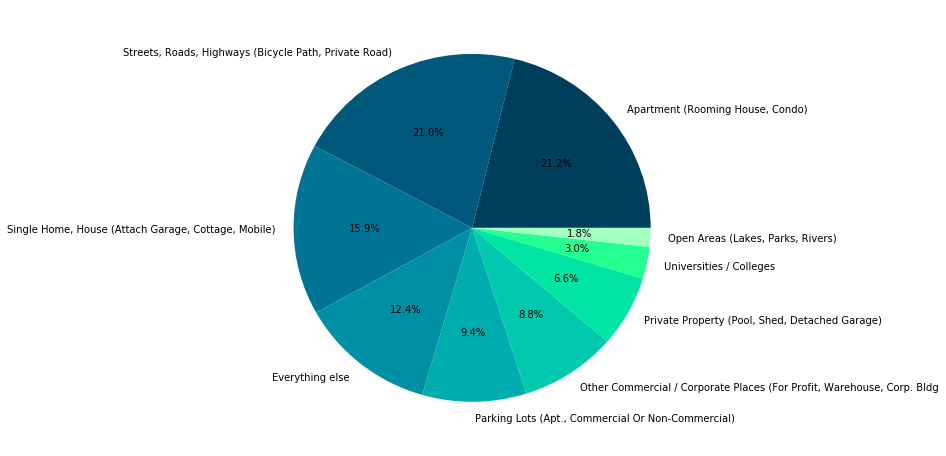

In [15]:
loc_df = crime_df.groupby("Location_Type").count().sort_values("Y", ascending=False)
total = sum(loc_df['Y'])
loc_df['percent'] = loc_df.Y*100/total
pie = loc_df[:8]
pie = pie.append(pd.DataFrame([['Everything else', 100-sum(pie.percent)]], columns=['Location_Type', 'percent']).set_index('Location_Type'))
pie = pie.sort_values('percent', ascending=False)
ax = pie.plot(kind="pie", y="percent", figsize=(8,8), legend=False, autopct='%1.1f%%')
ax.set_ylabel("")


In [12]:
pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:,.2f}%'.format
# loc_df.percent.to_frame().reset_index().to_html("tables/full_locationtype.html")

In [16]:
# Costs
costs = crime_df[crime_df['Cost_of_Bike'].notnull()]
costs = costs[costs.Cost_of_Bike != "UNKNOWN"]
costdf = costs.loc[:,'Cost_of_Bike'].to_frame()

costdf['year'] = costdf.index.year
costdf['cost'] = pd.to_numeric(costdf['Cost_of_Bike'])
yearcost = costdf.groupby('year').sum().reset_index()

costch = chartify.Chart(blank_labels=True, x_axis_type='categorical')
costch.style.set_color_palette('categorical', theme4)
costch.plot.bar(data_frame=yearcost, 
            categorical_columns='year', 
            numeric_column='cost',
            color_column='year',
            categorical_order_by='labels',
            categorical_order_ascending=True)
costch.axes.set_yaxis_label('Cost of Reported Crime ($CAD)')
costch.axes.set_xaxis_label('Year')
costch.set_source_label("Source: Toronto Police Service")

costch.show()

c:\users\simon\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [14]:
costhist = chartify.Chart(blank_labels=True, y_axis_type='density')
costhist.style.set_color_palette('categorical',theme4)
costhist.set_subtitle("")
costhist.plot.histogram(
    data_frame=costdf,
    values_column='cost',
    bins=400)
costhist.axes.set_xaxis_label('Cost of Bicycle')
costhist.axes.set_yaxis_label('Number of Bicycles')
costhist.set_source_label("Source: Toronto Police Service")
costhist.show()

costhist.axes.set_xaxis_range(0,2000)
costhist.axes.set_xaxis_tick_values(list(range(0,2001,100)))
costhist.set_source_label("Source: Toronto Police Service")

costhist.show()



In [15]:
np.array(costs.Cost_of_Bike.astype(float)).mean()
missing_vals = len(crime_df) - len(costdf)
missing_vals

1665

Status
STOLEN      93.87%
UNKNOWN     4.86% 
RECOVERED   1.27% 
Name: percent, dtype: float64

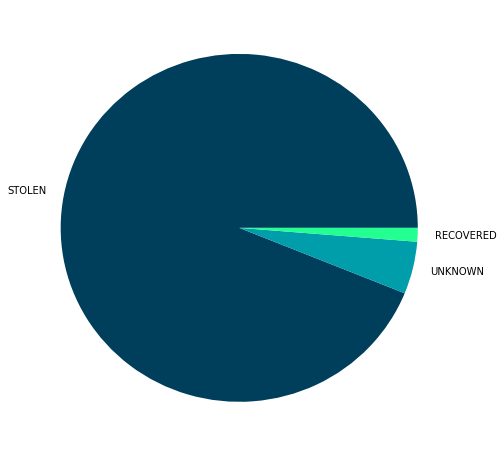

In [16]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#003f5c','#009eab', '#23ff91'])
status_df = crime_df.groupby("Status").count()
status_df['percent'] = status_df['X']*100/total
status_df = status_df.sort_values('percent', ascending=False)
sax = status_df.plot(kind="pie", y="percent", figsize=(8,8), legend=False)
sax.set_ylabel("")
status_df['percent']
# status_df

In [17]:
status_by_division = crime_df.groupby(["Status", "Division"]).count()
status_by_division

X     Y  Primary_Offence  Location_Type  premisetype  \
Status    Division                                                            
RECOVERED 11        21    21    21               21             21            
          13        9     9     9                9              9             
          14        30    30    30               30             30            
          22        11    11    11               11             11            
          23        2     2     2                2              2             
          31        2     2     2                2              2             
          32        6     6     6                6              6             
          33        4     4     4                4              4             
          41        3     3     3                3              3             
          42        3     3     3                3              3             
          43        6     6     6                6              6             
          51        33    33    33               33             33            
          52        18    18    18               18             18            
          53        13    13    13               13             13            
          54        5     5     5                5              5             
          55        16    16    16               16             16            
STOLEN    11        960   960   960              960            960           
          12        144   144   144              144            144           
          13        529   529   529              529            529           
          14        2264  2264  2264             2264           2264          
          22        523   523   523              523            523           
          23        146   146   146              146            146           
          31        214   214   214              214            214           
          32        648   648   648              648            648           
          33        182   182   182              182            182           
          41        278   278   278              278            278           
          42        111   111   111              111            111           
          43        252   252   252              252            252           
          51        2224  2224  2224             2224           2224          
          52        2510  2510  2510             2510           2510          
          53        1065  1065  1065             1065           1065          
          54        347   347   347              347            347           
          55        1007  1007  1007             1007           1007          
UNKNOWN   11        46    46    46               46             46            
          12        13    13    13               13             13            
          13        18    18    18               18             18            
          14        102   102   102              102            102           
          22        25    25    25               25             25            
          23        11    11    11               11             11            
          31        17    17    17               17             17            
          32        45    45    45               45             45            
          33        11    11    11               11             11            
          41        19    19    19               19             19            
          42        7     7     7                7              7             
          43        25    25    25               25             25            
          51        115   115   115              115            115           
          52        108   108   108              108            108           
          53        54    54    54               54             54            
          54        25    25    25               25             25       

In [18]:
fulln = crime_df.groupby("Neighbourhood").count().reset_index()
fulln = fulln.loc[:,['Neighbourhood', 'X']].sort_values('X', ascending=False)
fulln['rank'] = list(range(1,len(fulln)+1))
# fulln.to_html('tables/full_neighbourhood_list.html')


In [19]:
crimetype = crime_df.groupby('Primary_Offence').count().loc[:,'X'].to_frame().reset_index().sort_values('X', ascending=False)
# crimetype.to_html('tables/crime_type.html')

In [20]:
# crime_df.groupby("Bike_Type").count().sort_values("X", ascending=False)["X"].to_frame().reset_index().to_html('tables/types.html')

In [21]:
# crime_df.groupby("Bike_Colour").count().sort_values("X", ascending=False)["X"].to_frame().reset_index().to_html('tables/color.html')

In [22]:
# crime_df.groupby("Bike_Make").count().sort_values("X", ascending=False)["X"].to_frame().reset_index().to_html('tables/brand.html')

In [23]:
#TODO: by crimes by police division